In [136]:
import pandas as pd
import geopandas as gpd
import tarfile
from shapely.geometry import Point
import contextily as ctx
import matplotlib.pyplot as plt
from lxml import etree

In [132]:
telpunten = gpd.read_file('./070_Levering_NDW_Shapefiles_20210430/Telpunten_WGS84.shp')
telpunten = telpunten.set_index('dgl_loc')

meetvakken = gpd.read_file('./070_Levering_NDW_Shapefiles_20210430/Meetvakken_WGS84.shp')
meetvakken = meetvakken.set_index('dgl_loc')

telpunten.sample(4)

,id,naam,meetricht,wegtype,meetgeg,ref_mvak,geometry
dgl_loc,,,,,,,
RWS01_MONICA_00D00207B448D0070007,12216,00D00207B448D0070007,177,H,3,None,POINT (4.98656 52.17432)
PFL01_TI156B,16945,PFL01_156-B,286,O,3,None,POINT (5.72379 52.54069)
RWS01_MONICA_00D04F000806D0050005,12028,00D04F000806D0050005,227,H,3,None,POINT (5.72671 50.86808)
RDH01_TI230-B,16235,RDH_TI230-B,286,O,3,None,POINT (4.60267 51.84684)


In [151]:
in_file = gzip.open('./files/trafficspeed/trafficspeed202105171149.xml.gz', 'r')
tree1 = etree.parse(in_file)

in_file = gzip.open('./files/traveltime/traveltime202105171145.xml.gz', 'r')
tree2 = etree.parse(in_file)

XMLSyntaxError: Document is empty, line 1, column 1 (traveltime202105171145.xml.gz, line 1)

In [122]:
measures_list = [(
    measure.find(".//{http://datex2.eu/schema/2/2_0}measurementSiteReference").get('id'),
    measure.findtext('.//{http://datex2.eu/schema/2/2_0}basicData//{http://datex2.eu/schema/2/2_0}duration'),
    measure.findtext('.//{http://datex2.eu/schema/2/2_0}measuredValueExtension//{http://datex2.eu/schema/2/2_0}duration'),
) for measure in tree2.getroot().findall(".//{http://datex2.eu/schema/2/2_0}siteMeasurements")]

measured = pd.DataFrame(measures_list, columns=['dgl_loc', 'baseTime', 'travelTime'])
measured = measured.set_index('dgl_loc')
measured.sample(5)


In [145]:
meetvakken = meetvakken.merge(measured, on='dgl_loc')

In [146]:
point = Point(4.57938, 51.916838).buffer(0.025)
point

telpunten_f = telpunten[telpunten.within(point)]
meetvakken_f = meetvakken[meetvakken.within(point)]

In [153]:
meetvakken_f.sample(5)

,id,naam,lengte,wegtype,meetgeg,ref_begin,ref_eind,ref_loc,geometry,baseTime_x,travelTime_x,baseTime_y,travelTime_y
dgl_loc,,,,,,,,,,,,,
GRT04_MORO_6089,27397,S127 Pr Alexanderlaan kr Jan van Tilburgstraat...,391.0,O,4,82189,82190,82191,"LINESTRING (4.56434 51.92777, 4.56442 51.92768...",57.784,31.280,57.784,31.280
GRT04_MORO_2503_2,26948,Abraham van Rijckervorselweg - Kanaalweg -- Ca...,1599.0,O,4,80842,80843,80844,"LINESTRING (4.58303 51.93322, 4.58222 51.93275...",164.414,134.623,164.414,134.623
GRT04_MORO_6096,27283,Nieuwe Tiendweg kr Groenendaal - Nieuwe Tiendw...,1025.0,O,4,81847,81848,81849,"LINESTRING (4.60244 51.91844, 4.60244 51.91844...",105.324,84.661,105.324,84.661
GRT04_MORO_2616_2,27221,Capelseplein --> Abraham van Rijckervorselweg ...,1331.0,O,4,81661,81662,81663,"LINESTRING (4.57001 51.92579, 4.57185 51.92683...",113.000,106.557,113.000,106.557
GRT04_MORO_6103,27301,Nieuwe Tiendweg kr N210 CG Roosweg - Nieuwe Ti...,1231.0,O,4,81901,81902,81903,"LINESTRING (4.58948 51.91162, 4.58949 51.91163...",104.944,101.523,104.944,101.523


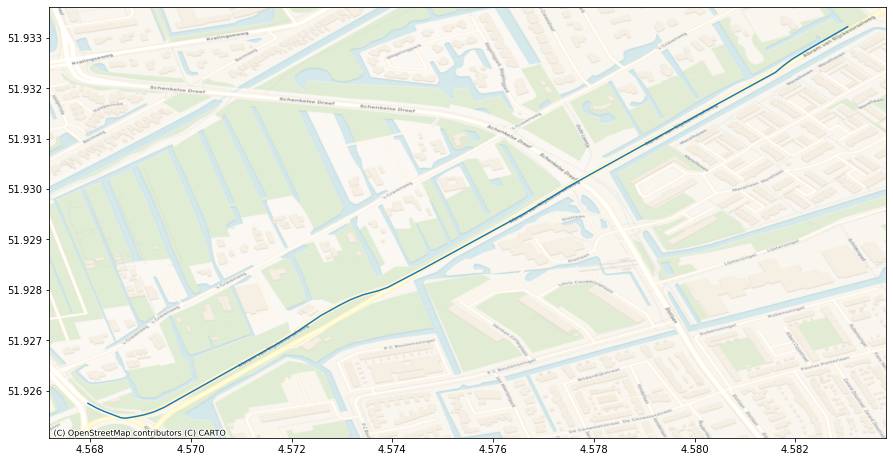

In [155]:
fig, ax = plt.subplots(figsize=(15,15))
i = 1
meetvakken_f[:1].plot(ax=ax)
ctx.add_basemap(ax, crs=telpunten.crs, source=ctx.providers.CartoDB.Voyager)

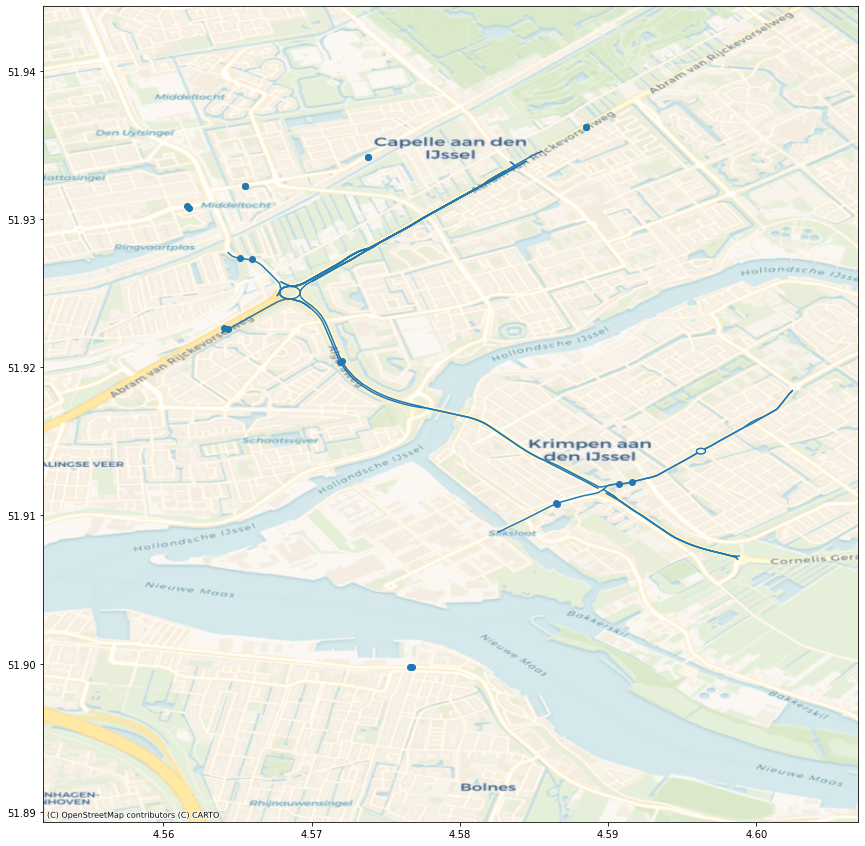

In [152]:
fig, ax = plt.subplots(figsize=(15,15))
from random import uniform

telpunten_f.plot(ax=ax)
meetvakken_f.plot(ax=ax)
gpd.GeoSeries(point).plot(ax=ax, alpha=0)
ctx.add_basemap(ax, crs=telpunten.crs, source=ctx.providers.CartoDB.Voyager)

```
<siteMeasurements>
 <measurementSiteReference id="PNB05_MOE_OudeHeijningsedijk_O14" targetClass="MeasurementSiteRecord" version="5"/>
 <measurementTimeDefault>
  2021-05-17T09:48:00.000Z
 </measurementTimeDefault>
 <measuredValue index="1" xsi:type="_SiteMeasurementsIndexMeasuredValue">
  <measuredValue xsi:type="MeasuredValue">
   <basicData xsi:type="TravelTimeData">
    <travelTimeType>
     reconstituted
    </travelTimeType>
    <travelTime>
     <duration>
      18.941
     </duration>
    </travelTime>
   </basicData>
   <measuredValueExtension>
    <measuredValueExtended>
     <basicDataReferenceValue>
      <referenceValueType>
       staticReferenceValue
      </referenceValueType>
      <travelTimeData>
       <travelTimeType>
        reconstituted
       </travelTimeType>
       <travelTime>
        <duration>
         19.178
        </duration>
       </travelTime>
      </travelTimeData>
     </basicDataReferenceValue>
    </measuredValueExtended>
   </measuredValueExtension>
  </measuredValue>
 </measuredValue>
</siteMeasurements>
```